In [1]:
!uv pip install pydot -q

# Autoencoders for Reconstructions

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Load and Preprocess Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

## Define Model Architecture
## Encoder

In [ ]:
latent_dim = 32  # Size of the compressed representation

# Encoder
input_img = Input(shape=(28, 28), name='encoder_input')
flattened = Flatten(name='encoder_flatten')(input_img)
encoded1 = Dense(128, activation='relu', name='encoder_dense1')(flattened)
encoded2 = Dense(64, activation='relu', name='encoder_dense2')(encoded1)
bottleneck = Dense(latent_dim, activation='relu', name='bottleneck')(encoded2)

encoder = Model(input_img, bottleneck, name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_flatten (Flatten)       │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

## Decoder

In [ ]:
decoder_input = Input(shape=(latent_dim,), name='decoder_input')
decoded1 = Dense(64, activation='relu', name='decoder_dense1')(decoder_input)
decoded2 = Dense(128, activation='relu', name='decoder_dense2')(decoded1)
decoded3 = Dense(784, activation='sigmoid', name='decoder_output')(decoded2)
reconstructed = Reshape((28, 28), name='decoder_reshape')(decoded3)

decoder = Model(decoder_input, reconstructed, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense1 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense2 (Dense)          │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_reshape (Reshape)       │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

## Combining encoder and decoder

In [11]:
# Autoencoder (combining encoder and decoder)
autoencoder_input = Input(shape=(28, 28), name='autoencoder_input')
encoded_repr = encoder(autoencoder_input)
reconstructed_img = decoder(encoded_repr)
autoencoder = Model(autoencoder_input, reconstructed_img, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28)         │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# # 2. Define Model Architecture
# latent_dim = 32  # Size of the compressed representation

# # Encoder
# input_img = Input(shape=(28, 28))
# flattened = Flatten()(input_img)
# encoded = Dense(128, activation='relu')(flattened)
# encoded = Dense(64, activation='relu')(encoded)
# encoded = Dense(latent_dim, activation='relu')(encoded) # Bottleneck

# # Decoder
# decoded = Dense(64, activation='relu')(encoded)
# decoded = Dense(128, activation='relu')(decoded)
# decoded = Dense(784, activation='sigmoid')(decoded) # 784 = 28 * 28
# reconstructed = Reshape((28, 28))(decoded)

# autoencoder = Model(input_img, reconstructed)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.summary()


In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

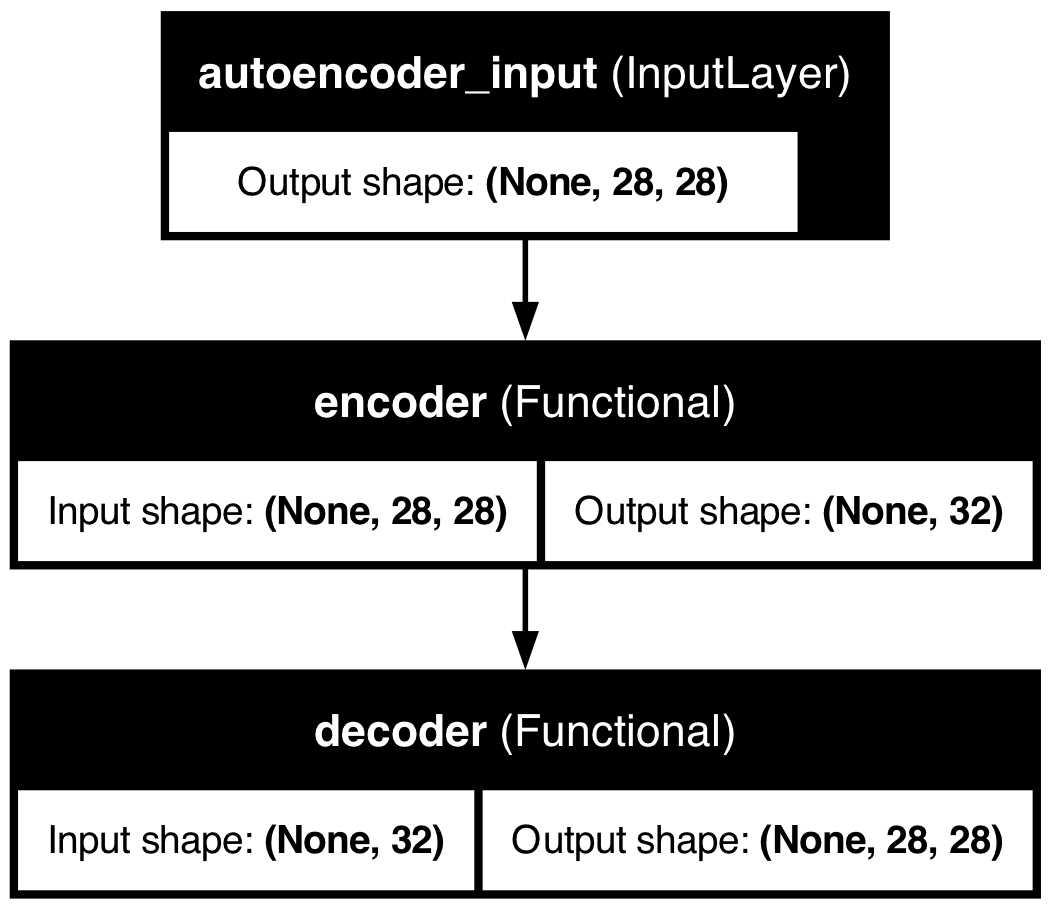

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



## Train the model

In [17]:
# 3. Train the Autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3372 - val_loss: 0.1662
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1577 - val_loss: 0.1343
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1325 - val_loss: 0.1232
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1233 - val_loss: 0.1160
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1159 - val_loss: 0.1109
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1103 - val_loss: 0.1071
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1074 - val_loss: 0.1043
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1052 - val_loss: 0.1027
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1033 - val_loss: 0.1008
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1015 - val_loss: 0.0995


In [18]:
# 4. Visualize the Reconstructions
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step


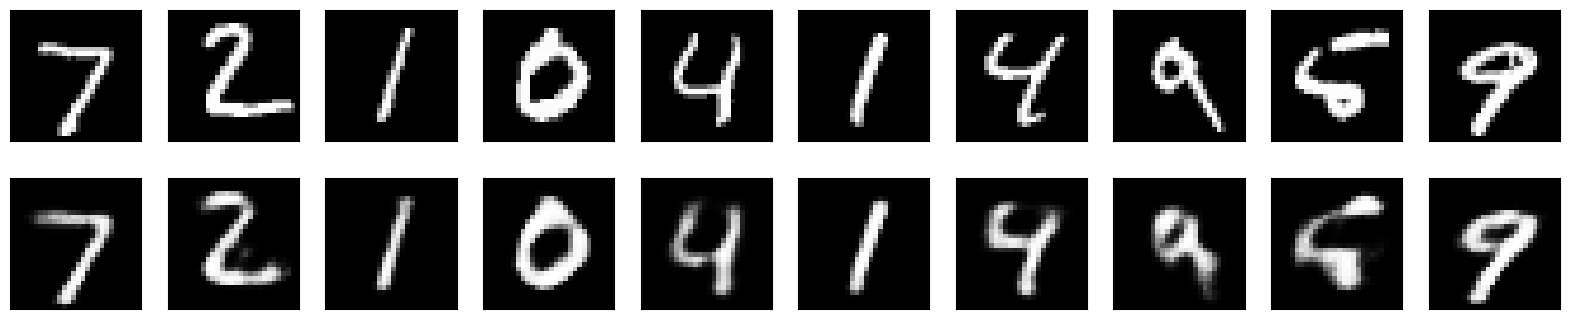

In [19]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising Autoencoders
A denoising autoencoder is trained to remove noise from its input. Instead of reconstructing the exact input, it learns to map noisy data to clean data. This is useful for tasks like image denoising, where the goal is to recover the original image from a corrupted version.

In [20]:
# 1. Add noise to the MNIST images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

We show three rows for each sample:

* __Original__: The clean MNIST digit.
* __Noisy__: The same digit with added noise.
* __Denoised__: The output from the autoencoder when given the noisy image.

If you run this cell before training, the "denoised" images are just the autoencoder's random output—they don't look clean yet. This helps you see the baseline: the model can't denoise before learning.

After training, the "denoised" images should look much closer to the originals, showing the autoencoder has learned to remove noise.



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step


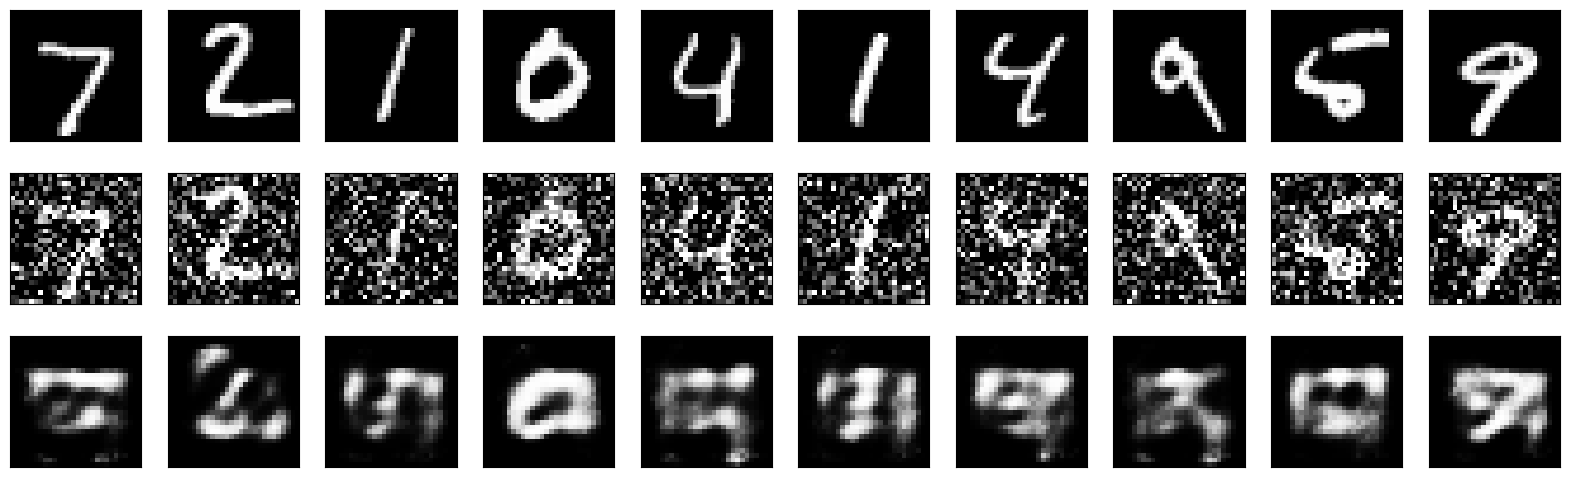

In [21]:
# Visualize denoising before training (weights are random)
sample_denoised_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Original', fontsize=14)
    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Noisy', fontsize=14)
    # Denoised (before training)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(sample_denoised_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Denoised (init)', fontsize=14)
plt.show()

In [22]:
# 2. Train the autoencoder for denoising
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1693 - val_loss: 0.1294
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1294 - val_loss: 0.1264
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1265 - val_loss: 0.1250
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1247 - val_loss: 0.1237
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1236 - val_loss: 0.1230
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1224 - val_loss: 0.1223
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1215 - val_loss: 0.1215
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1209 - val_loss: 0.1219
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1205 - val_loss: 0.1207
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1197 - val_loss: 0.1199


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step


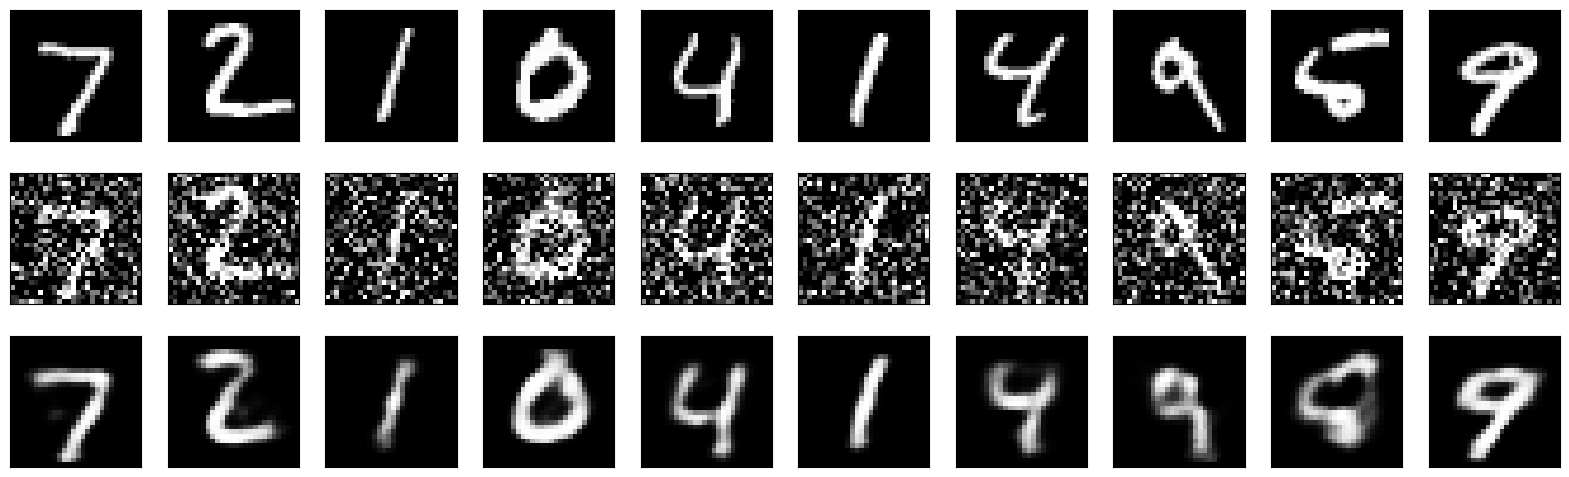

In [23]:
# 3. Visualize original, noisy, and denoised images
denoised_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Original', fontsize=14)
    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Noisy', fontsize=14)
    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Denoised', fontsize=14)
plt.show()

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [26]:
# 2. Define Model Architecture
latent_dim = 32  # Size of the compressed representation

# Encoder
input_img = Input(shape=(28, 28), name='encoder_input')
flattened = Flatten(name='encoder_flatten')(input_img)
encoded1 = Dense(128, activation='relu', name='encoder_dense1')(flattened)
encoded2 = Dense(64, activation='relu', name='encoder_dense2')(encoded1)
bottleneck = Dense(latent_dim, activation='relu', name='bottleneck')(encoded2)

encoder = Model(input_img, bottleneck, name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_flatten (Flatten)       │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Decoder
decoder_input = Input(shape=(latent_dim,), name='decoder_input')
decoded1 = Dense(64, activation='relu', name='decoder_dense1')(decoder_input)
decoded2 = Dense(128, activation='relu', name='decoder_dense2')(decoded1)
decoded3 = Dense(784, activation='sigmoid', name='decoder_output')(decoded2)
reconstructed = Reshape((28, 28), name='decoder_reshape')(decoded3)

decoder = Model(decoder_input, reconstructed, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense1 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense2 (Dense)          │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_reshape (Reshape)       │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Autoencoder (combining encoder and decoder)
autoencoder_input = Input(shape=(28, 28), name='autoencoder_input')
encoded_repr = encoder(autoencoder_input)
reconstructed_img = decoder(encoded_repr)
autoencoder = Model(autoencoder_input, reconstructed_img, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28)         │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras import losses
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [30]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0798 - val_loss: 0.0253
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0798 - val_loss: 0.0253
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0236 - val_loss: 0.0208
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0236 - val_loss: 0.0208
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0202 - val_loss: 0.0189
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0202 - val_loss: 0.0189
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187 - val_loss: 0.0179
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187 - val_loss: 0.0179
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175 - val_loss: 0.0173
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175 - val_loss: 0.0173
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168 - val_loss: 0.0162
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 

In [33]:
# Visualize original and reconstructed Fashion MNIST images
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


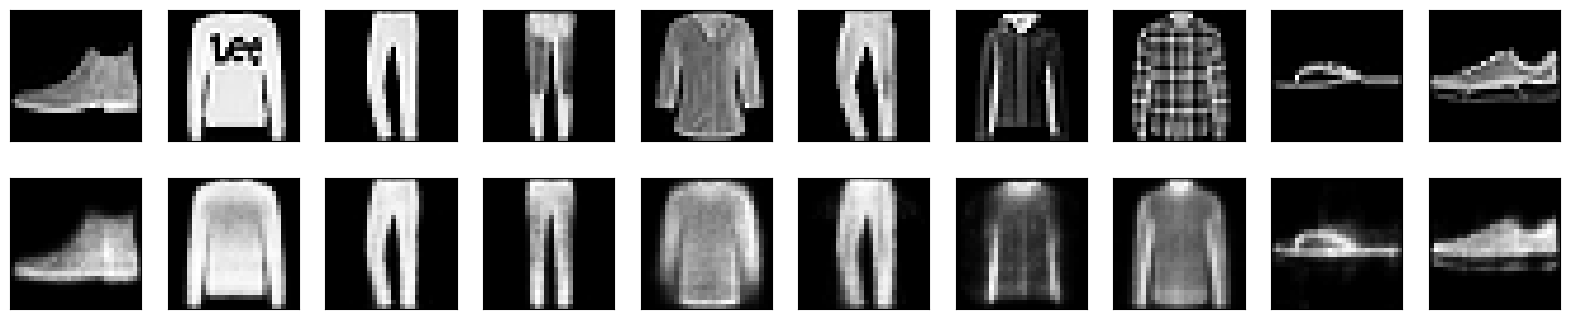

In [34]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Original', fontsize=14)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_ylabel('Reconstructed', fontsize=14)
plt.show()

# Variational Autoencoder (VAE)

 A VAE is a probabilistic take on the autoencoder, a model which takes high dimensional input data and compresses it into a smaller representation. Unlike a traditional autoencoder, which maps the input onto a latent vector, a VAE maps the input data into the parameters of a probability distribution, such as the mean and variance of a Gaussian. This approach produces a continuous, structured latent space, which is useful for image generation.

## Define the Sampling Layer
First, we need a way to sample from the distribution our encoder creates. The "reparameterization trick" is used here, which is essential for allowing the gradients to flow back through the network during training. This can be implemented as a custom Keras layer.

In [35]:
# VAE: Define the Sampling Layer
class Sampling(tf.keras.layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

## Rebuild the Encoder for the VAE

The VAE encoder is slightly different. Instead of one output (the bottleneck), it will have two: `z_mean` and `z_log_var` (the log of the variance). These define our latent space distribution.

In [36]:
# VAE: Define the Encoder
latent_dim = 2  # Using a 2D latent space to easily visualize it

# Original input
encoder_inputs = Input(shape=(28, 28), name='vae_encoder_input')
x = Flatten()(encoder_inputs)
x = Dense(128, activation='relu')(x)

# VAE specific outputs
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])

# Instantiate the encoder model
vae_encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name='vae_encoder')
vae_encoder.summary()

Model: "vae_encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ vae_encoder_input   │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ vae_encoder_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │    100,480 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 100,996 (394.52 KB)

 Trainable params: 100,996 (394.52 KB)

 Non-trainable params: 0 (0.00 B)

## Reuse the Decoder
The great part is that you can reuse the exact same decoder architecture you defined earlier! The only change is that we'll create a new instance of it that connects to the output of our new VAE encoder.

In [37]:
# VAE: Define the Decoder (reusing the same architecture)
latent_inputs = Input(shape=(latent_dim,), name='vae_decoder_input')
x = Dense(64, activation='relu')(latent_inputs)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
outputs = Reshape((28, 28))(x)

# Instantiate the decoder model
vae_decoder = Model(latent_inputs, outputs, name='vae_decoder')
vae_decoder.summary()

Model: "vae_decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vae_decoder_input (InputLayer)  │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,648 (428.31 KB)

 Trainable params: 109,648 (428.31 KB)

 Non-trainable params: 0 (0.00 B)

## Define the VAE as a Custom Model with Loss
The VAE loss function is the most unique part. It has two components:

1. __Reconstruction Los__s: How well the decoded image matches the original (similar to a standard autoencoder). We'll use `binary_crossentropy`.

2. __KL Divergence Loss__: This is a regularization term that forces the learned distributions to be close to a standard normal distribution, which keeps the latent space organized.

We can package this logic neatly inside a custom `tf.keras.Model` class.

In [44]:
# VAE: Define the full VAE model with a weighted custom loss
class VAE(tf.keras.Model):
    # Add a kl_weight argument to the constructor
    def __init__(self, encoder, decoder, kl_weight=1.0, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.kl_weight = kl_weight  # Store the weight
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            
            # *** THE KEY CHANGE IS HERE ***
            # Apply the weight to the KL loss before adding it
            total_loss = reconstruction_loss + self.kl_weight * kl_loss
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

The `kl_loss` in a Variational Autoencoder (VAE) is the Kullback-Leibler (KL) divergence between the learned latent distribution and a standard normal distribution.

__Purpose__:

* It regularizes the encoder so that the latent space is continuous and well-structured.
* It encourages the encoded vectors (mean and variance) to be close to a normal distribution (mean 0, variance 1).

__Why is this important?__

* Without KL loss, the encoder could map each input to a separate point, making the latent space discontinuous.
* With KL loss, you can sample new points from the latent space and generate realistic outputs.

> `kl_loss` keeps the latent space organized and enables generative capabilities in VAEs.

In [46]:
# Instantiate the VAE with a KL weight
# This is a hyperparameter you can tune. Start small.
vae = VAE(vae_encoder, vae_decoder, kl_weight=0.01)
vae.compile(optimizer=tf.keras.optimizers.Adam())


In [47]:
vae.summary()

Model: "vae_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vae_encoder (Functional)        │ ((None, 2), (None, 2), │       100,996 │
│                                 │ (None, 2))             │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vae_decoder (Functional)        │ (None, 28, 28)         │       109,648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,644 (822.83 KB)

 Trainable params: 210,644 (822.83 KB)

 Non-trainable params: 0 (0.00 B)

## Train the VAE and Visualize the Latent Space

In [48]:
# Load MNIST data again (if needed, ensure it's flattened for VAE)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Train the VAE
# 20-30 epochs is usually good for a simple VAE on MNIST
vae.fit(x_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 2.6786 - loss: 6.7602 - reconstruction_loss: 6.7334
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 2.6786 - loss: 6.7602 - reconstruction_loss: 6.7334
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 6.4399 - loss: 5.9802 - reconstruction_loss: 5.9158
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 6.4399 - loss: 5.9802 - reconstruction_loss: 5.9158
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 6.7980 - loss: 5.8416 - reconstruction_loss: 5.7736
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 6.7980 - loss: 5.8416 - reconstruction_loss: 5.7736
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 6.9297 - loss: 5.7735 - reconstruction_loss: 5.7042
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 6.9297 - loss: 5.7735 - reconstruction_loss: 5.7042
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 7.0289 - loss: 5.

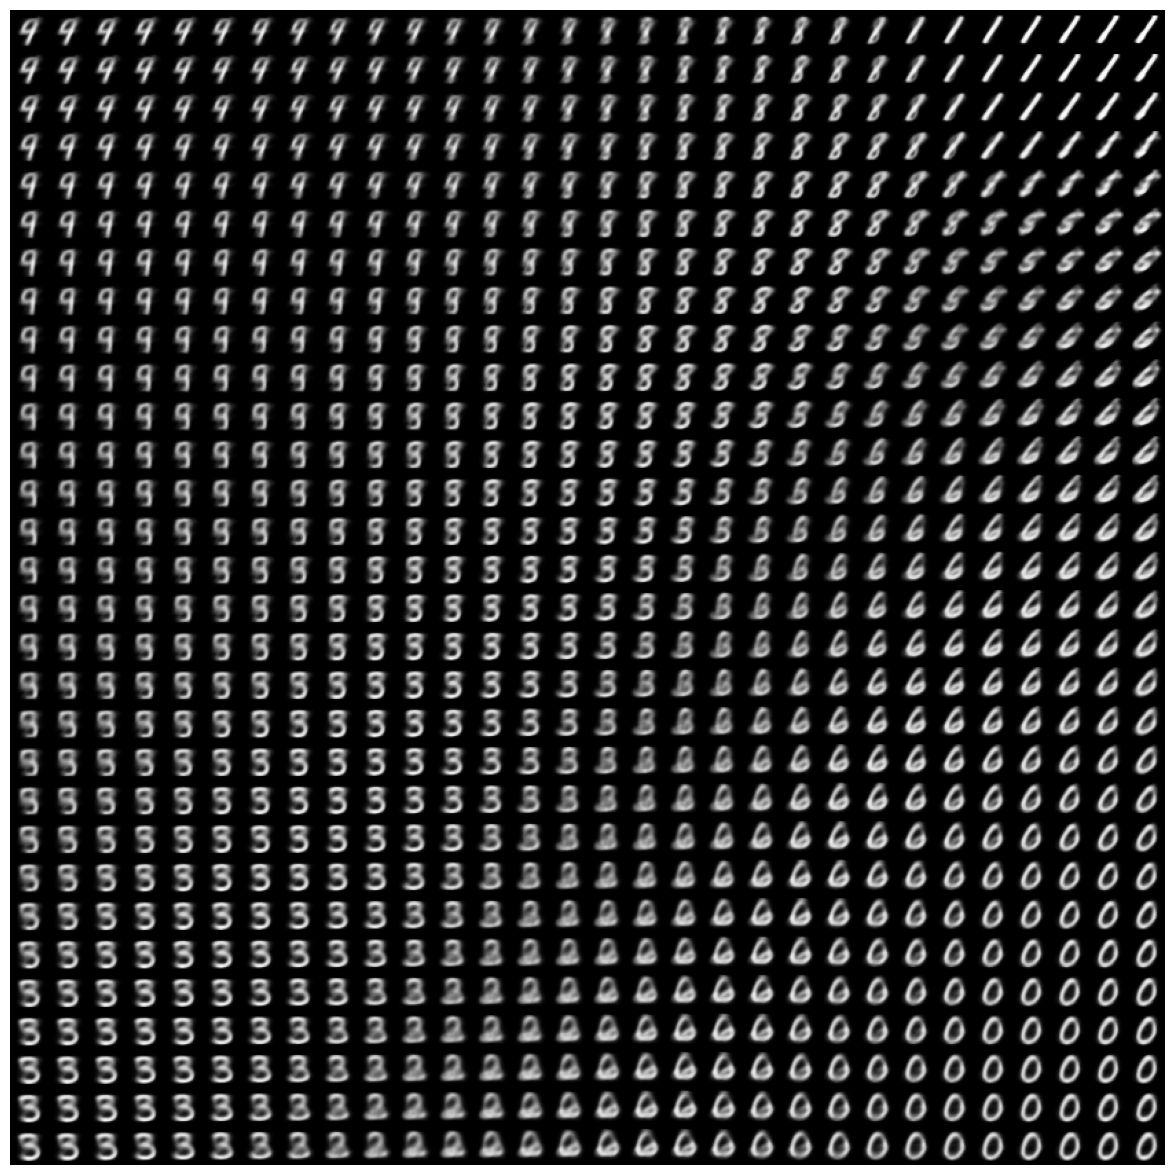

In [49]:
# Visualize how the digits are clustered in the latent space
def plot_latent_space(vae, n=30, figsize=15):
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    
    # Create a grid of 2D points
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap="Greys_r")
    plt.axis("Off")
    plt.show()

plot_latent_space(vae)

This grid is a map of your VAE's "understanding" of the MNIST digits. Here's a breakdown of what you're seeing:

* __Clustering of Similar Digits__: You can clearly see that the model has grouped similar digits together. There are distinct regions for '9's, '8's, '5's, '3's, '6's, and '0's. This is a sign of a well-organized latent space.

* __Smooth Transitions__: Notice how the digits gradually morph into one another as you move across the grid. For instance, the '8's on the top right seem to blend into the '1's. Similarly, the '3's slowly transform into '2's. This continuous transition is a hallmark of a successful VAE and demonstrates its generative capabilities.

* __Generative Power__: Each image in this grid is a brand-new, computer-generated digit. Your model can now generate a vast array of unique digits by simply picking a coordinate in this latent space and feeding it to the decoder.